✅ Resultado salvo em solucoes\sol-mgval_0.50_10B.dat
=== RESUMO DO GRAFO ===
1. Número de vértices: 50
2. Número de arestas: 33
3. Número de arcos: 101
4. Vértices obrigatórios: 44
5. Arestas obrigatórias: 16
6. Arcos obrigatórios: 50
7. É direcionado? Sim
8. Densidade: 0.0412
9. Grau mínimo: 1
10. Grau máximo: 5
11. Número de componentes conexos: 1
12. Caminho médio: 14.00
13. Diâmetro: 37

Graus dos vértices:
{1: 3, 2: 3, 3: 2, 4: 2, 5: 2, 6: 5, 7: 4, 8: 3, 9: 5, 10: 2, 11: 3, 12: 4, 13: 3, 14: 4, 15: 4, 16: 4, 17: 3, 18: 4, 19: 2, 20: 4, 21: 2, 22: 4, 23: 1, 24: 4, 25: 2, 26: 5, 27: 5, 28: 3, 29: 2, 30: 1, 31: 3, 32: 5, 33: 5, 34: 5, 35: 4, 36: 4, 37: 3, 38: 4, 39: 2, 40: 3, 41: 5, 42: 4, 43: 5, 44: 3, 45: 3, 46: 2, 47: 3, 48: 2, 49: 4, 50: 3}

Intermediação (Betweenness Centrality):
Vértice 13: 59.7829
Vértice 14: 56.6282
Vértice 12: 55.2135
Vértice 19: 52.8996
Vértice 15: 52.0971
Vértice 26: 51.2694
Vértice 34: 45.5796
Vértice 11: 43.9396
Vértice 18: 43.2318
Vértice 9: 34.7988
Vér

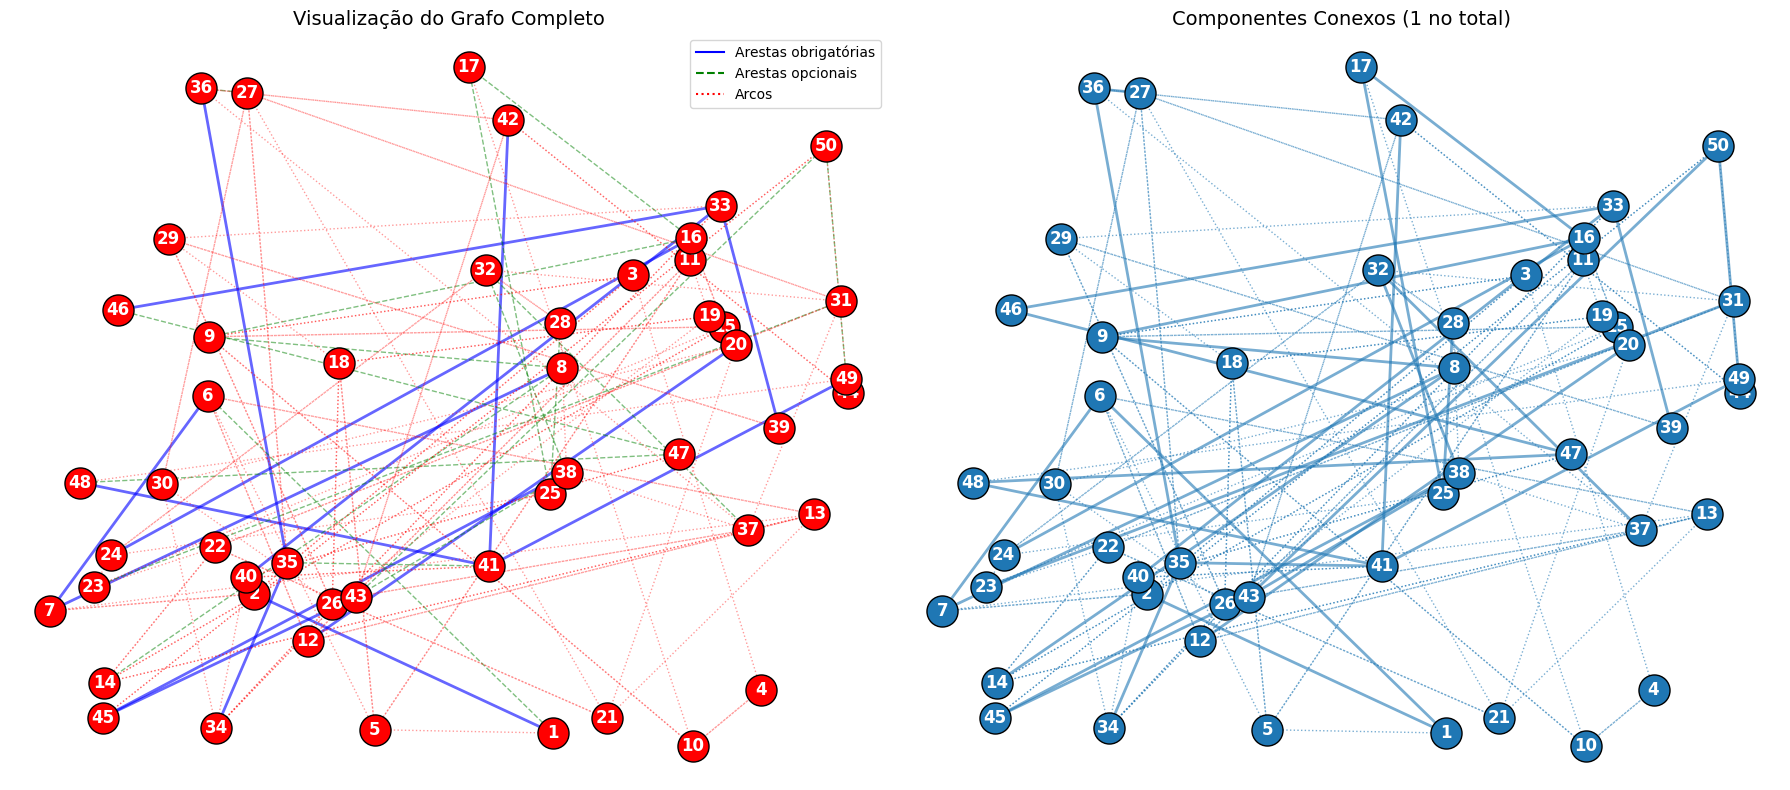


Matriz de distâncias (amostra 5x5):
['0.0', '8.0', '14.0', '21.0', '7.0']
['8.0', '0.0', '6.0', '17.0', '12.0']
['14.0', '6.0', '0.0', '16.0', '17.0']
['20.0', '12.0', '6.0', '0.0', '23.0']
['10.0', '14.0', '17.0', '23.0', '0.0']


In [ ]:
import matplotlib.pyplot as plt
import random
import time
import os
from grafos import carregar_instancia, gerar_resumo
from etapa2 import path_scanning, salvar_resultado_arquivo, GrafoCARPAdaptado 

# --- Parte de Análise e Visualização 

def visualizar_grafo(caminho_arquivo):
    grafo_data, num_nos = carregar_instancia(caminho_arquivo)
    resumo = gerar_resumo(grafo_data, num_nos)

    # Exibir resumo completo
    print("=== RESUMO DO GRAFO ===")
    print(f"1. Número de vértices: {resumo['vertices']}")
    print(f"2. Número de arestas: {resumo['arestas_total']}")
    print(f"3. Número de arcos: {resumo['arcos_total']}")
    print(f"4. Vértices obrigatórios: {resumo['vertices_req']}")
    print(f"5. Arestas obrigatórias: {resumo['arestas_req']}")
    print(f"6. Arcos obrigatórios: {resumo['arcos_req']}")
    print(f"7. É direcionado? {'Sim' if resumo['direcionado'] else 'Não'}")
    print(f"8. Densidade: {resumo['densidade']:.4f}")
    print(f"9. Grau mínimo: {resumo['grau_minimo']}")
    print(f"10. Grau máximo: {resumo['grau_maximo']}")
    print(f"11. Número de componentes conexos: {resumo['num_componentes']}")
    print(f"12. Caminho médio: {resumo['caminho_medio']:.2f}")
    print(f"13. Diâmetro: {resumo['diametro']}")

    # Adicionando a exibição dos graus
    print("\nGraus dos vértices:")
    print(resumo['graus'])
    
    print("\nIntermediação (Betweenness Centrality):")
    for v, score in sorted(resumo['intermediacao'].items(), key=lambda x: x[1], reverse=True):
        print(f"Vértice {v}: {score:.4f}")

    # Visualização do grafo
    random.seed(42) 
    posicoes = {no: (random.uniform(0, 1), random.uniform(0, 1)) for no in range(1, num_nos + 1)}

    fig, (ax_grafo, ax_comp) = plt.subplots(1, 2, figsize=(18, 8))

    # Plotar grafo completo
    for origem, destino, *_ in grafo_data['arestas_req']:
        x1, y1 = posicoes[origem]
        x2, y2 = posicoes[destino]
        ax_grafo.plot([x1, x2], [y1, y2], 'b-', linewidth=2, alpha=0.6)

    for origem, destino, *_ in grafo_data['arestas_opc']:
        x1, y1 = posicoes[origem]
        x2, y2 = posicoes[destino]
        ax_grafo.plot([x1, x2], [y1, y2], 'g--', linewidth=1, alpha=0.5)

    for origem, destino, *_ in grafo_data['arcos_req'] + grafo_data['arcos_opc']:
        x1, y1 = posicoes[origem]
        x2, y2 = posicoes[destino]
        ax_grafo.plot([x1, x2], [y1, y2], 'r:', linewidth=1, alpha=0.4)

    for no, (x, y) in posicoes.items():
        ax_grafo.scatter(x, y, color='red', s=500, edgecolors='black', zorder=3)
        ax_grafo.text(x, y, str(no), fontsize=12, ha='center', va='center', color='white', fontweight='bold')

    ax_grafo.set_xticks([])
    ax_grafo.set_yticks([])
    ax_grafo.set_title("Visualização do Grafo Completo", fontsize=14)
    ax_grafo.set_frame_on(False)

    # Plotar componentes conexos
    cores = plt.cm.tab10.colors
    for i, componente in enumerate(resumo['componentes']):
        cor = cores[i % len(cores)]
        for no in componente:
            x, y = posicoes[no]
            ax_comp.scatter(x, y, color=cor, s=500, edgecolors='black', zorder=3)
            ax_comp.text(x, y, str(no), fontsize=12, ha='center', va='center', color='white', fontweight='bold')
        
        for origem, destino, *_ in grafo_data['arestas_req'] + grafo_data['arestas_opc']:
            if origem in componente and destino in componente:
                x1, y1 = posicoes[origem]
                x2, y2 = posicoes[destino]
                ax_comp.plot([x1, x2], [y1, y2], color=cor, linestyle='-', linewidth=2, alpha=0.6)
        
        for origem, destino, *_ in grafo_data['arcos_req'] + grafo_data['arcos_opc']:
            if origem in componente and destino in componente:
                x1, y1 = posicoes[origem]
                x2, y2 = posicoes[destino]
                ax_comp.plot([x1, x2], [y1, y2], color=cor, linestyle=':', linewidth=1, alpha=0.6)

    ax_comp.set_xticks([])
    ax_comp.set_yticks([])
    ax_comp.set_title(f"Componentes Conexos ({len(resumo['componentes'])} no total)", fontsize=14)
    ax_comp.set_frame_on(False)

    # Legenda
    azul = plt.Line2D([], [], color='blue', label='Arestas obrigatórias')
    verde = plt.Line2D([], [], color='green', linestyle='--', label='Arestas opcionais')
    vermelho = plt.Line2D([], [], color='red', linestyle=':', label='Arcos')
    ax_grafo.legend(handles=[azul, verde, vermelho], loc="upper right")

    plt.tight_layout()
    plt.show()

    # Exibir matriz de distâncias
    print("\nMatriz de distâncias (amostra 5x5):")

    for linha in resumo['distancias'][:5]:
        print([f"{x:.1f}" if x != float('inf') else "∞" for x in linha[:5]])


# --- Execução do Algoritmo Path-Scanning ---

# Solicita o nome do arquivo ao usuário
nome_arquivo_entrada = input("Digite o caminho completo ou o nome do arquivo da instância (ex: instancias/teste.dat): ")
caminho_arquivo = nome_arquivo_entrada


# Carrega a instância usando sua função
try:
    grafo_data, num_vertices = carregar_instancia(caminho_arquivo)
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado. Verifique o caminho e o nome do arquivo.")
    exit() # Encerra o script se o arquivo não for encontrado
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    exit()

# Cria uma instância da classe adaptadora para o Path-Scanning
grafo_adaptado = GrafoCARPAdaptado(grafo_data, num_vertices)

inicio_total = time.monotonic_ns()
inicio_solucao = time.monotonic_ns()

# Executa o algoritmo Path-Scanning
resultado = path_scanning(grafo_adaptado)

fim_solucao = time.monotonic_ns()
fim_total = time.monotonic_ns()

tempo_geral = fim_total - inicio_total
tempo_algoritmo = fim_solucao - inicio_solucao

# Define a pasta de saída e o nome do arquivo
pasta_saida = "solucoes"
os.makedirs(pasta_saida, exist_ok=True)  # cria a pasta se não existir

# Obtém o nome base do arquivo para usar no nome da saída
nome_base_arquivo = os.path.basename(caminho_arquivo).replace('.dat','')
nome_saida = f"sol-{nome_base_arquivo}.dat"
caminho_saida = os.path.join(pasta_saida, nome_saida)

# Salva o resultado no arquivo
try:
    salvar_resultado_arquivo(resultado, tempo_geral, tempo_algoritmo, caminho_saida)
    print(f"✅ Resultado salvo em {caminho_saida}")
except Exception as e:
    print(f"Erro ao salvar o resultado no arquivo: {e}")

visualizar_grafo(caminho_arquivo)